# Multiple linear regression and adjusted R-squared

In [1]:
import numpy as np
import pandas as pd
import scipy 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('/home/home02/earshar/data_science/main/data/csv_datasets/multiple_linear_regression.csv')

In [3]:
data

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


In [12]:
new_data = pd.DataFrame({'SAT':[1714,1664], 'GPA':[2.40,2.52]})
new_data = new_data[['SAT','GPA']]

## Create your first multiple regression

- Replace the expression for `x1` with the commented line to go through the example in the course notes.
- The plotting code below throws an error because `x1` and `y` are not the same size, so we would need to modify this part before continuing. 
- However, the point of the exercise is to show that adding extra variables (`Rand 1,2,3`) isn't always beneficial. The conclusion is that we should throw this new variable out. 

In [9]:
y = data['GPA']
x1 = data['SAT']
#x1 = data[['SAT', 'Rand 1,2,3']]

### Regression itself

- First, estimate the intercept (`x0`) using the `add_constant` method
- `results` will contain the output of the Ordinary Least Squares (OLS) regression
- `fit ` will apply a specific estimation technique (OLS here) to obtain the fit of the model
- `results.summary` will summarise your results
- `R-squared` value measures the goodness of fit of your model (how well your model fits the data)
- `Adjusted R-squared` value takes into account additional independent variables (rather than just one). 
- Most of the useful statistics are found in the second table. The coefficient and slope are represented by `const` (0.2750) and `SAT` (0.0017), respectively. The p-value of 0.000 for `SAT` indicates that SAT is a significant variable when predicting GPA. The p-value of 0.503 for `const` indicates that the coefficient is most likely different from zero (variable is not significant). This part is not too important, given that we're not really fussed whether or not the regression line passes through the intercept.
- In the table below, you can see that the variable `Rand 1,2,3` not only worsens the explanatory power of the model (compare the Adjusted R-squared value with that from the `regression.ipynb` notebook), but is also insignificant (p-value of 0.762, when we are looking for a value < 0.05 for statistical significance). 
- This second coefficient we have added impacts the intercept (compare `const`) in these two notebooks. 
- The lower the `F-statistic` value, the closer to a non-significant model. The score of 27.76 here vs 56.05 in the previous notebook indicates that the introduction of the new variable weakened our model.  

In [10]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           7.20e-11
Time:                        09:10:15   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Replot the data and overlay the regression line

- Line which is closest to all point simultaneously

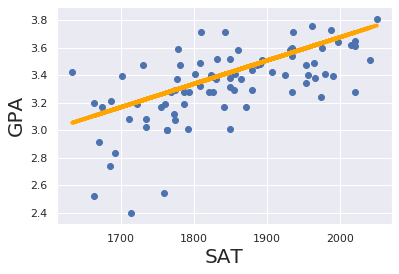

In [11]:
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()